In [1]:
############################################
BaseDir      = 'IntroDDSJpn/Chap03/'
OutputDir    = '3LM-0203LineLSQM/'
FileBaseName = '3LM-0203LineLSQM'

* Google Colabかどうかを判別し、このJupyter Notebookのあるディレクトリを特定します。

In [2]:
############################################
import sys
import os
############################################
def IsGoogleColab():
  if 'google.colab' in sys.modules:
    return True
  else:
    return False
############################################
if IsGoogleColab():
  #
  from google.colab import drive
  drive.mount('/content/drive')
  #
  IpynbDir = 'drive/My Drive/Colab Notebooks/' + BaseDir
else:
  #
  IpynbDir =  os.getcwd() + '/'
############################################
print( 'ipynb file path = %s' % IpynbDir )

ipynb file path = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/


* 必要なパッケージを読み込み、ファイルの出力先のディレクトリを用意します。

In [3]:
############################################
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
print('matplotlib Ver.', mpl.__version__)
#
############################################
import numpy as np
import numpy.random as rd
print('numpy      Ver.', np.__version__)
#
############################################
import sklearn as skl
import sklearn.linear_model as lm
import sklearn.preprocessing as prep
print('sklearn    Ver.', skl.__version__)
#
############################################
FilePath = IpynbDir + OutputDir
print( 'FilePath = %s' % FilePath )
#
if( True != os.path.isdir(FilePath) ):
    print('  making %s' % FilePath )
    os.mkdir(FilePath)
else:
    print(' %s is exist.' % FilePath )

matplotlib Ver. 3.9.2
numpy      Ver. 1.26.4
sklearn    Ver. 1.5.2
FilePath = d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3LM-0203LineLSQM/
  making d:\home\iakai\CY\Docs\Kuma3Curriculum\2025森北出版\GitHubIntroDDSJpn\IntroDDSJpn\Chap03/3LM-0203LineLSQM/


線形写像の最小二乗法

* 線形写像:
$$
\boldsymbol{y}\approx\mathbf{X}\,\boldsymbol{\omega}
$$

* 最小二乗法型の一般化逆行列:
$$
\left(\mathbf{X}^{\intercal}\mathbf{X}\right)^{-1}
\mathbf{X}^{\intercal}
$$

* 最小二乗法の解:
$$
\hat{\boldsymbol{\omega}}
=
\left(\mathbf{X}^{\intercal}\mathbf{X}\right)^{-1}
\mathbf{X}^{\intercal}
\boldsymbol{y}
$$

直線回帰:

* $y=a\,x+b$

$$
    \left(
      \begin{array}{c}
        y_{1}  \\
        \vdots \\
        y_{n}  \\
        \vdots \\
        y_{N}
      \end{array}
    \right)
    =
    \left(
      \begin{array}{cc}
        x_{1} & 1 \\
        \vdots \\
        x_{n} & 1 \\
        \vdots \\
        x_{N} & 1
      \end{array}
    \right)
    \left(
      \begin{array}{c}
        a \\
        b
      \end{array}
    \right)
$$

簡単な例

* データセット(3点) $\{(-1.0, 1.0), (1.0, 1.5), (3.0, 7.0) \}$

$$
\boldsymbol{x}
=
\left(
  \begin{array}{c}
    x_{1} \\
    x_{2} \\
    x_{3}
  \end{array}
\right)
=
\left(
  \begin{array}{c}
    -1.0 \\
    1.0 \\
    3.0
  \end{array}
\right)
,\quad
\boldsymbol{y}
=
\left(
  \begin{array}{c}
    y_{1} \\
    y_{2} \\
    y_{3}
  \end{array}
\right)
=
\left(
  \begin{array}{c}
    1.0 \\
    1.5 \\
    7.0
  \end{array}
\right)
$$

$$
\mathbf{X}
=
\left(
  \begin{array}{cc}
    X_{11} & X_{12} \\
    X_{21} & X_{22} \\
    X_{31} & X_{32}
  \end{array}
\right)
=
\left(
  \begin{array}{cc}
    -1.0 & 1.0 \\
    1.0  & 1.0 \\
    3.0  & 1.0  
  \end{array}
\right)
,\quad
\boldsymbol{\omega}
=
\left(
  \begin{array}{c}
    a \\
    b
  \end{array}
\right)
$$

In [4]:
############################################
x_data = np.array( [ -1,   1,   3 ] )
y_data = np.array( [  1, 1.5, 7.0 ] )
XX = np.array( [ [-1, 1],
                 [ 1, 1],
                 [ 3, 1] ] )
print( XX )

[[-1  1]
 [ 1  1]
 [ 3  1]]


* 最小二乗法型の一般化逆行列:
$$
\left(\mathbf{X}^{\intercal}\mathbf{X}\right)^{-1}
\mathbf{X}^{\intercal}
$$

In [5]:
############################################
XX_inv = np.linalg.inv( XX.T @ XX ) @ XX.T
print( XX )
print( XX.T )

[[-1  1]
 [ 1  1]
 [ 3  1]]
[[-1  1  3]
 [ 1  1  1]]


* 最小二乗法の解:
$$
\hat{\boldsymbol{\omega}}
=
\left(\mathbf{X}^{\intercal}\mathbf{X}\right)^{-1}
\mathbf{X}^{\intercal}
\boldsymbol{y}
$$

* 最小二乗法の解を用いた回帰データ:
$$
\hat{\boldsymbol{y}}
=
\mathbf{X}
\hat{\boldsymbol{\omega}}
$$

In [6]:
############################################
omega_hat = XX_inv @ y_data
print( omega_hat )
#
############################################
y_reg = XX @ omega_hat
print( y_reg )

[1.5        1.66666667]
[0.16666667 3.16666667 6.16666667]


連立方程式
$$
\left(
  \begin{array}{c}
    y_{1} \\
    y_{2} \\
    y_{3}
  \end{array}
\right)
=
\left(
  \begin{array}{cc}
    X_{11} & X_{12} \\
    X_{21} & X_{22} \\
    X_{31} & X_{32}
  \end{array}
\right)
\left(
  \begin{array}{c}
    a \\
    b
  \end{array}
\right)
$$

連立方程式

* CASE-1: 
$$
\left(
  \begin{array}{c}
    y_{1} \\
    y_{2}
  \end{array}
\right)
=
\left(
  \begin{array}{cc}
    X_{11} & X_{12} \\
    X_{21} & X_{22}
  \end{array}
\right)
\left(
  \begin{array}{c}
    a_{1} \\
    b_{1}
  \end{array}
\right)
$$
を満たす
$$
\hat{\boldsymbol{\omega}}_{1}
=
\left(
  \begin{array}{c}
    a_{1} \\
    b_{1}
  \end{array}
\right)
=
\left(
  \begin{array}{cc}
    X_{11} & X_{12} \\
    X_{21} & X_{22}
  \end{array}
\right)^{-1}
\left(
  \begin{array}{c}
    y_{1} \\
    y_{2}
  \end{array}
\right)
$$

In [7]:
############################################
x_data1 = np.array( [ -1,   1 ] )
y_data1 = np.array( [  1, 1.5 ] )
XX1 = np.array( [ [-1, 1],
                  [ 1, 1] ] )
omega1 = np.linalg.inv( XX1 ) @ y_data1
print( omega1 )

[0.25 1.25]


連立方程式

* CASE-2:
$$
\left(
  \begin{array}{c}
    y_{2} \\
    y_{3}
  \end{array}
\right)
=
\left(
  \begin{array}{cc}
    X_{21} & X_{22} \\
    X_{31} & X_{32}
  \end{array}
\right)
\left(
  \begin{array}{c}
    a_{2} \\
    b_{2}
  \end{array}
\right)
$$
を満たす
$$
\hat{\boldsymbol{\omega}}_{2}
=
\left(
  \begin{array}{c}
    a_{2} \\
    b_{2}
  \end{array}
\right)
=
\left(
  \begin{array}{cc}
    X_{21} & X_{22} \\
    X_{31} & X_{32}
  \end{array}
\right)^{-1}
\left(
  \begin{array}{c}
    y_{2} \\
    y_{3}
  \end{array}
\right)
$$

In [8]:
############################################
x_data2 = np.array( [  1,   3 ] )
y_data2 = np.array( [1.5, 7.0 ] )
XX2 = np.array( [ [ 1, 1],
                  [ 3, 1] ] )
omega2 = np.linalg.inv( XX2 ) @ y_data2
print( omega2 )

[ 2.75 -1.25]


連立方程式

* CASE-3: 
$$
\left(
  \begin{array}{c}
    y_{1} \\
    y_{3}
  \end{array}
\right)
=
\left(
  \begin{array}{cc}
    X_{11} & X_{12} \\
    X_{31} & X_{32}
  \end{array}
\right)
\left(
  \begin{array}{c}
    a_{3} \\
    b_{3}
  \end{array}
\right)
$$
$$
\hat{\boldsymbol{\omega}}_{3}
=
\left(
  \begin{array}{c}
    a_{3} \\
    b_{3}
  \end{array}
\right)
=
\left(
  \begin{array}{cc}
    X_{11} & X_{12} \\
    X_{31} & X_{32}
  \end{array}
\right)^{-1}
\left(
  \begin{array}{c}
    y_{1} \\
    y_{3}
  \end{array}
\right)
$$

In [9]:
############################################
x_data3= np.array( [ -1,   3 ] )
y_data3= np.array( [  1, 7.0 ] )
XX3 = np.array( [ [-1, 1],
                 [ 3, 1] ] )
omega3 = np.linalg.inv( XX3 ) @ y_data3
print( omega3 )

[1.5 2.5]


データグラフを描く関数

In [10]:
############################################
def Grf_XYdata(data_sets):
  #
  plt.rcParams['font.size'] = 16
  #
  fig = plt.figure( figsize=(6,5) )
  fig.subplots_adjust( left=0.15, right=0.95, top=0.95,  bottom=0.15 )
  #
  ########
  ax1 = fig.add_subplot(1,1,1)
  #
  for data_set in data_sets:
    #
    (plot_mode, plot_color, size)  = data_set[ 0 ]
    plot_x     = data_set[ 1 ]
    plot_y     = data_set[ 2 ]
    plot_label = data_set[ 3 ]
    #
    if   plot_mode == 'scatter':
      ax1.scatter( plot_x, plot_y, label=plot_label, color=plot_color, s=size)
    elif plot_mode == 'solidplot':
      ax1.plot( plot_x, plot_y, label=plot_label, color=plot_color, linestyle='solid',  linewidth=size )
    elif plot_mode == 'dashedplot':
      ax1.plot( plot_x, plot_y, label=plot_label, color=plot_color, linestyle='dashed', linewidth=size )
    #
  #
  ##############################
  # 座標軸
  ax1.axhline( y=0.0, color='black', linestyle='dashed', linewidth=0.5 )
  ax1.axvline( x=0.0, color='black', linestyle='dashed', linewidth=0.5 )
  #
  ax1.set_xlabel( r'$x$' )
  ax1.set_ylabel( r'$y$' )
  #
  ##############################
  ax1.legend( fontsize=14 )
  #
  plt.show()
  #
  return fig

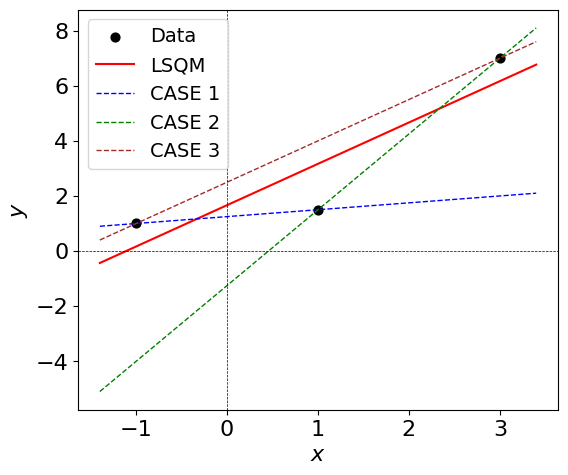

In [11]:
############################################
x_data_min = np.amin( x_data )
x_data_max = np.amax( x_data )
#
x_data_center = (x_data_max + x_data_min)/2.0
x_data_width  = (x_data_max - x_data_min)/2.0
#
xlim_left  = x_data_center - 1.2 * x_data_width
xlim_right = x_data_center + 1.2 * x_data_width
#
plot_x_data = np.linspace( xlim_left, xlim_right, num = 10 )
#
############################################
# 最小二乗法の解による回帰
plot_y_data = omega_hat[0] * plot_x_data + omega_hat[1]
#
############################################
# CASE 1
plot_y_data1 = omega1[0] * plot_x_data + omega1[1]
# CASE 2
plot_y_data2 = omega2[0] * plot_x_data + omega2[1]
# CASE 3
plot_y_data3 = omega3[0] * plot_x_data + omega3[1]
#
############################################
plot_sets = [ [('scatter',     'black',  40), x_data,      y_data,       'Data'   ],
              [ ('solidplot',  'red',   1.5), plot_x_data, plot_y_data,  'LSQM'   ],
              [ ('dashedplot', 'blue',  1.0), plot_x_data, plot_y_data1, 'CASE 1' ],
              [ ('dashedplot', 'green', 1.0), plot_x_data, plot_y_data2, 'CASE 2' ],
              [ ('dashedplot', 'brown', 1.0), plot_x_data, plot_y_data3, 'CASE 3' ]]
############################################
fig = Grf_XYdata( plot_sets )
#
fig.savefig( FilePath + FileBaseName + '-XYdata-01.pdf' )

連立方程式
$$
\left(
  \begin{array}{c}
    y_{1} \\
    y_{2} \\
    y_{3}
  \end{array}
\right)
=
\left(
  \begin{array}{cc}
    X_{11} & X_{12} \\
    X_{21} & X_{22} \\
    X_{31} & X_{32}
  \end{array}
\right)
\left(
  \begin{array}{c}
    a \\
    b
  \end{array}
\right)
$$

In [12]:
############################################
a_min = np.amin( [omega_hat[0], omega1[0], omega2[0], omega3[0]] )
a_max = np.amax( [omega_hat[0], omega1[0], omega2[0], omega3[0]] )
#
a_center = (a_max + a_min) / 2.0
a_width  = (a_max - a_min) / 2.0
a_left   = a_center - 1.2 * a_width
a_right  = a_center + 1.2 * a_width
#
a_data = np.linspace( a_left, a_right, num=10 )
#
############################################
b_min = np.amin( [omega_hat[1], omega1[1], omega2[1], omega3[1]] )
b_max = np.amax( [omega_hat[1], omega1[1], omega2[1], omega3[1]] )
#
b_center = (b_max + b_min) / 2.0
b_width  = (b_max - b_min) / 2.0
b_bot    = b_center - 1.2 * b_width
b_top    = b_center + 1.2 * b_width

* $y_{1} = X_{11} a + X_{12} b $

  $$
  b
  =
  -\frac{X_{11}}{X_{12}}a + \frac{y_{1}}{X_{12}}
  $$

* $y_{2} = X_{21} a + X_{22} b $

  $$
  b
  =
  -\frac{X_{21}}{X_{22}}a + \frac{y_{2}}{X_{22}}
  $$

* $y_{3} = X_{31} a + X_{32} b $

  $$
  b
  =
  -\frac{X_{31}}{X_{32}}a + \frac{y_{3}}{X_{32}}
  $$


In [13]:
############################################
b_data1 = - XX[0,0] / XX[0,1] * a_data + y_data[0] / XX[0,1]
#
b_data2 = - XX[1,0] / XX[1,1] * a_data + y_data[1] / XX[1,1]
#
b_data3 = - XX[2,0] / XX[2,1] * a_data + y_data[2] / XX[2,1]

$a$, $b$空間を描く関数

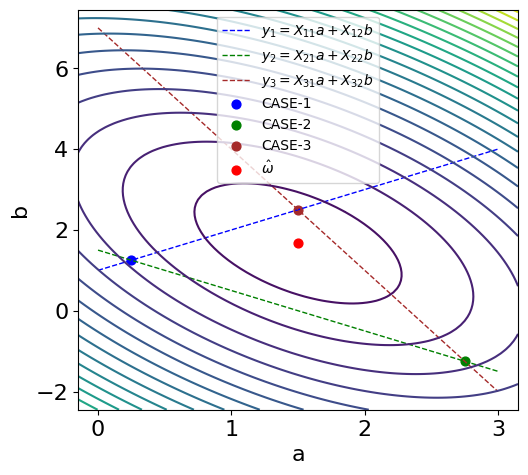

In [14]:
#
plt.rcParams['font.size'] = 16
#
# fig = plt.figure( figsize=(7,5) )
fig = plt.figure( figsize=(5.5,5) )
fig.subplots_adjust( left=0.15, right=0.95, top=0.95,  bottom=0.15 )
#
########
ax1 = fig.add_subplot(1,1,1)
#
########
ax1.set_xlabel( r'a' )
ax1.set_ylabel( r'b' )
#
########
# b_data1
ax1.plot( a_data, b_data1, label=r'$y_{1} = X_{11} a + X_{12} b $', color='blue', linestyle='dashed', linewidth=1.0 )
# b_data2
ax1.plot( a_data, b_data2, label=r'$y_{2} = X_{21} a + X_{22} b $', color='green', linestyle='dashed', linewidth=1.0 )
# b_data3
ax1.plot( a_data, b_data3, label=r'$y_{3} = X_{31} a + X_{32} b $', color='brown', linestyle='dashed', linewidth=1.0 )
#
#
########
a_left, a_right = ax1.set_xlim()
b_bot,  b_top   = ax1.set_ylim()
#
a_ = np.linspace( a_left, a_right, num=100 )
b_ = np.linspace( b_bot,  b_top,   num=100 )
#
aa, bb = np.meshgrid(a_, b_)
#
yy1 = XX[0,0] * aa + XX[0,1] * bb
yy2 = XX[1,0] * aa + XX[1,1] * bb
yy3 = XX[2,0] * aa + XX[2,1] * bb
Err = ( (yy1 - y_data[0])**2 + (yy2 - y_data[1])**2 + (yy3 - y_data[2])**2 ) / 3.0
#
# cf = ax1.contourf(aa, bb, Err, levels=20, alpha=0.5, cmap='nipy_spectral')
# #
# fig.colorbar( cf )
#
# 等高線図
ax1.contour(aa, bb, Err, levels=20,cmap="viridis")
#
########
# CASE1
ax1.scatter( omega1[0], omega1[1], label='CASE-1', color='blue', s=40 )
# CASE2
ax1.scatter( omega2[0], omega2[1], label='CASE-2', color='green', s=40 )
# CASE3
ax1.scatter( omega3[0], omega3[1], label='CASE-3', color='brown', s=40 )
#
########
# omega_hat
ax1.scatter( omega_hat[0], omega_hat[1], label=r'$\hat{\omega}$', color='red', s=40 )
#
ax1.legend( fontsize=10 )
#
plt.show()
#
fig.savefig( FilePath + FileBaseName + '-ab_data-01.pdf' )